17946
0
75363
17789.622281490916
45.152556280971154


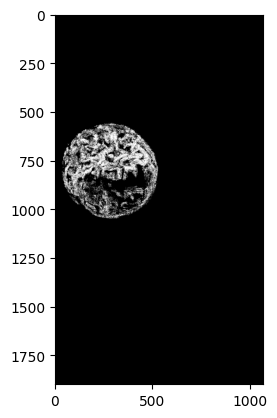

In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

depth_mask = "/mydata/data/hyunsoo/co3d_sample/apple/12_90_489/depth_masks/frame000001.png"
depth_image = "/mydata/data/hyunsoo/co3d_sample/apple/12_90_489/depths/frame000001.jpg.geometric.png"
depth_mask = Image.open(depth_mask)
depth_image = Image.open(depth_image)

depth_mask = np.array(depth_mask)
depth_image = np.array(depth_image)
depth_image = depth_image * depth_mask

depth_image_show = Image.fromarray(depth_image)
plt.imshow(depth_image_show)

print(max(depth_image.flatten()))
print(min(depth_image.flatten()))

# get the mean depth value
depth_image = depth_image[depth_image > 0]
print(len(depth_image))
print(np.mean(depth_image))
print(np.std(depth_image))

In [ ]:
import os
from tqdm import tqdm
mask_dir = "/mydata/data/hyunsoo/co3d_sample/apple/12_90_489/depth_masks/"
depth_dir = "/mydata/data/hyunsoo/co3d_sample/apple/12_90_489/depths/"
mask_files = os.listdir(mask_dir)
depth_files = os.listdir(depth_dir)

mean_depth = []
for mask_file in tqdm(mask_files):
    depth_mask = os.path.join(mask_dir, mask_file)
    depth_image = os.path.join(depth_dir, mask_file.replace(".png", ".jpg.geometric.png"))
    depth_mask = Image.open(depth_mask)
    depth_image = Image.open(depth_image)

    depth_mask = np.array(depth_mask)
    depth_image = np.array(depth_image)
    depth_image = depth_image * depth_mask

    depth_image_show = Image.fromarray(depth_image)

    # print(max(depth_image.flatten()))
    # print(min(depth_image.flatten()))

    # get the mean depth value
    depth_image = depth_image[depth_image > 0]
    mean_depth.append(np.mean(depth_image))
# print(mean_depth)
print(np.mean(mean_depth))


  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:06<00:00, 15.83it/s]

17962.679353453394


In [ ]:
import os
from tqdm import tqdm

data_dir = "/mydata/data/hyunsoo/co3d_sample/apple/"
folders = os.listdir(data_dir)
folders = [folder for folder in folders if os.path.isdir(os.path.join(data_dir, folder))]
object_depths = []
for folder in tqdm(folders):
    mask_dir = os.path.join(data_dir, folder, "depth_masks/")
    depth_dir = os.path.join(data_dir, folder, "depths/")
    mask_files = os.listdir(mask_dir)
    depth_files = os.listdir(depth_dir)

    # sample random 100 images
    np.random.shuffle(mask_files)

    seq_mean_depth = []
    for mask_file in mask_files[:100]:
        depth_mask = os.path.join(mask_dir, mask_file)
        depth_image = os.path.join(depth_dir, mask_file.replace(".png", ".jpg.geometric.png"))
        depth_mask = Image.open(depth_mask)
        depth_image = Image.open(depth_image)

        depth_mask = np.array(depth_mask)
        depth_image = np.array(depth_image)
        depth_image = depth_image * depth_mask

        depth_image_show = Image.fromarray(depth_image)

        # print(max(depth_image.flatten()))
        # print(min(depth_image.flatten()))

        # get the mean depth value
        depth_image = depth_image[depth_image > 0]
        if len(depth_image) > 0:
            cur_mean_depth = np.mean(depth_image)
            if not np.isnan(cur_mean_depth):
                seq_mean_depth.append(cur_mean_depth)
    
    # print(mean_depth)
    # print(np.mean(mean_depth))
    if len(seq_mean_depth) > 0:
        object_depths.append((folder, np.mean(seq_mean_depth)))
    else:
        print(folder)
# print(np.mean(object_depths))
# print(object_depths)


  0%|          | 0/396 [00:00<?, ?it/s]

 15%|█▍        | 58/396 [05:26<36:44,  6.52s/it]  

350_36676_67000


100%|██████████| 396/396 [21:37<00:00,  3.28s/it]


In [21]:
# get mean of non-nan value
print(object_depths)
print(np.mean(object_depths))

[17840.175738133126, 17738.645060700062, 17592.829785029815, 17466.741710149578, 17842.329122607855, 17713.045916891453, 17702.751681426005, 17456.45434955607, 17908.3901675336, 17984.523689286456, 18052.263971246954, 17429.53672619123, 17513.26246101628, 18700.879233395284, 17538.721003596307, 17806.557238577043, 17676.404524775782, 17677.01433132721, 17662.31667348781, 18184.73570376842, 17752.772124929605, 17937.78800394281, 17961.13247522878, 18928.74565019882, 17502.03768014613, 17691.68479026314, 17484.298726221932, 17722.82799875705, 18358.845830364397, 17647.194645143965, 17936.000154963687, 18751.09275777184, 17110.375179781782, 18332.870192064052, 19517.851878357334, 17826.900888425895, 17633.235144668735, 16911.78071337223, 17607.517992254714, 17528.889852315748, 17776.904630955738, 17887.132489223164, 17537.89859816672, 17962.55816719967, 17622.35732990064, 17256.050404680118, 17615.919041447938, 17565.736533298492, 18146.521985727213, 18000.407588635688, 17341.001838247772